In [2]:
import sys 
import numpy as np
#import settings as s
import matplotlib.pyplot as plt 
import importlib
#importlib.reload(s)
from cupyx.profiler import benchmark
import h5py
import os
import re
import time
import datetime
from datetime import datetime

sys.path.insert(0, '../../drlib')
import drlib as dr
%matplotlib widget

def mad_np(arr):
    median = np.median(arr)
    return np.median(np.abs(arr-median))

def freq2Idx(freq, freqsAll):
    return int(freq/freqsAll[-1] * len(freqsAll))

def idx2Freq(idx, freqs):
    return  ((freqs[-1] - freqs[0])/len(freqs) * idx) + freqs[0]

dataDir         = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/'

freqs = np.linspace(0, 320, 2**23)

#totalAcqs       = int(open(s.SAVE_DIRECTORY + 'database.txt', 'r'
#                    ).readlines()[-1].split(',')[0].strip()) + 1 

#print(totalAcqs)
    

In [3]:
#Average and save spectra


def rollingMadLim(spec,
    nSigma = 5,
    order = 1,
    fc_numBins = 100
):
    specFiltered = dr.filterSpec(spec, fc_numBins=fc_numBins, order=order)
    window = 1000

    rollingMadArr = dr.rolling(specFiltered, window, 1, mad_np, numProc=48)

    filter_fc           = 30 * window
    filteredMadArr  = dr.filterSpec(rollingMadArr, order = 2, fc_numBins = filter_fc, type = 'lowpass')
    diffFilterMadPadArr = dr.nanPad(filteredMadArr, window)
    rollMadLim      = diffFilterMadPadArr * nSigma * 1.48
    return rollMadLim, specFiltered, nSigma, order, fc_numBins


done mp
261 antenna candidates


Text(0, 0.5, 'Filtered Watts')

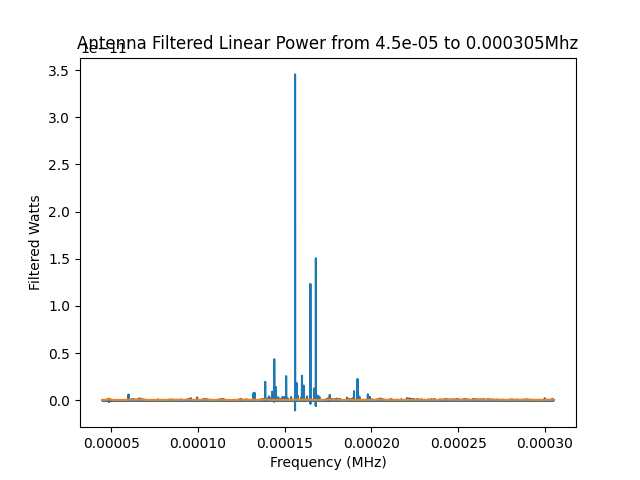

In [64]:
#termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV

W_dict_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV = np.load('/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV.npy', 
    allow_pickle=True
)

W_array_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV = W_dict_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV.item()['chBSpec_W']
filt_array_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV = rollingMadLim(W_array_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV)

filtAntSpec         = filt_array_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV[1][1:]
antRollingMadLim    = filt_array_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop]/1e6, filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop]/1e6,(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')


done mp
249 antenna candidates


Text(0, 0.5, 'Filtered Watts')

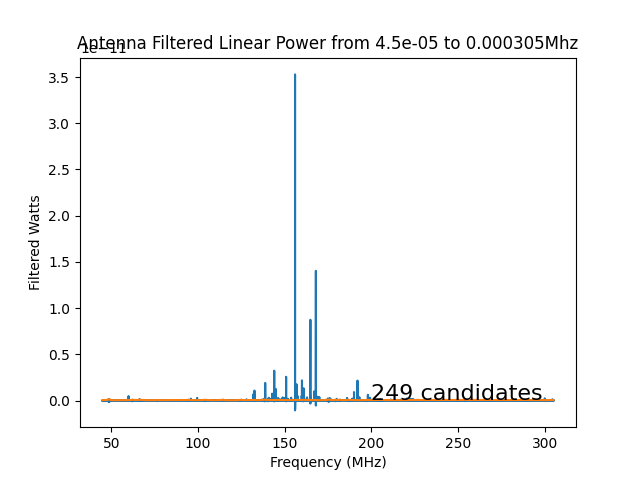

In [69]:
#Same as above, look for consistancy
# termBothOutAndInside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termBothOutandInside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV_v2'

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')


done mp
298 antenna candidates


Text(0, 0.5, 'Filtered Watts')

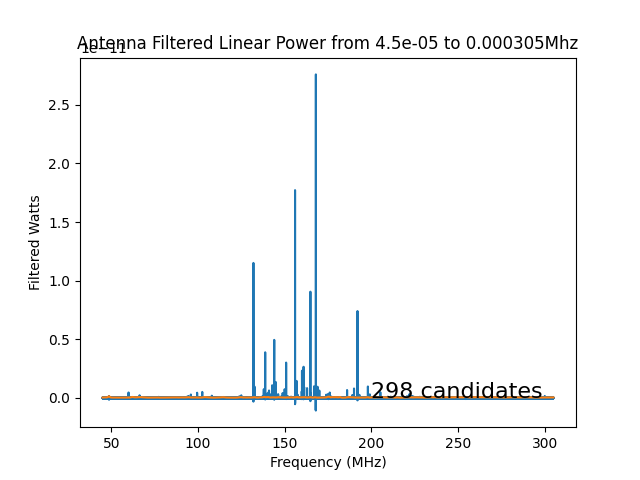

In [70]:
#Same as above, look for consistancy
# termBothOutAndInside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV_v2' 

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')


done mp
324 antenna candidates


Text(0, 0.5, 'Filtered Watts')

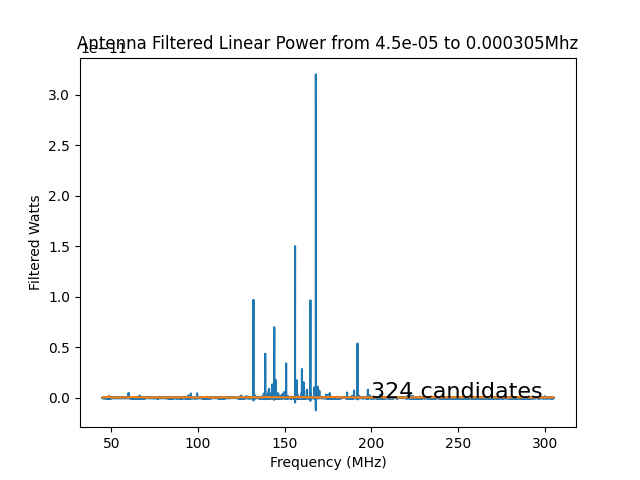

In [72]:
# back to no terminators insidie
#termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV'

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termOnlyOutside_allComputersOn_powerOn_extCablePluggedIn_tapeOnSHV' 

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')

done mp
310 antenna candidates


Text(0, 0.5, 'Filtered Watts')

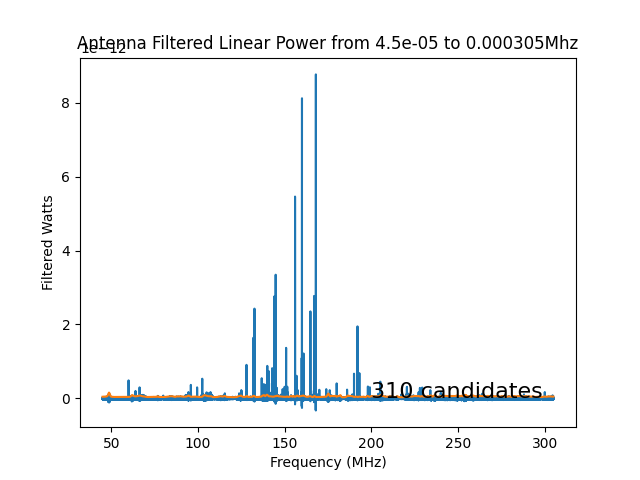

In [73]:
# back to no terminators insidie
#termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV'

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV' 

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')

done mp
278 antenna candidates


Text(0, 0.5, 'Filtered Watts')

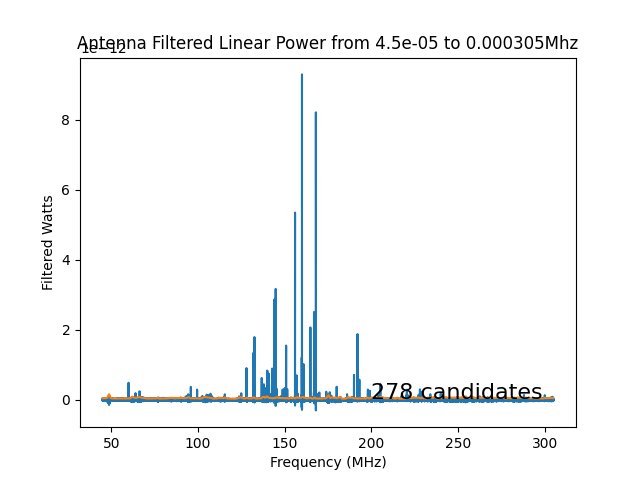

In [74]:
# back to no terminators insidie
#termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV'

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV_V2' 

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')

done mp
538 antenna candidates


Text(0, 0.5, 'Filtered Watts')

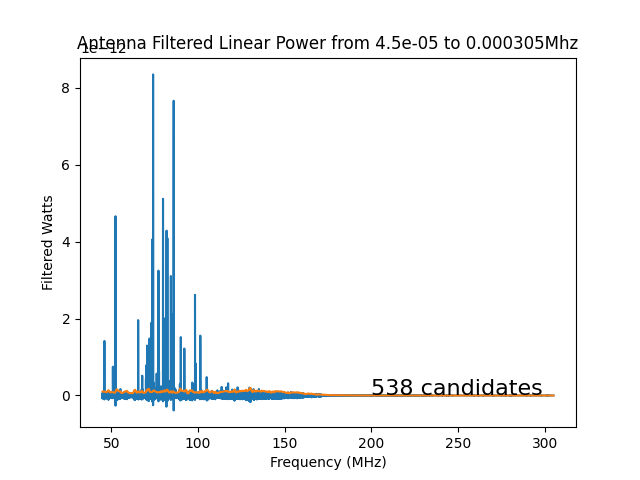

In [75]:
# back to no terminators insidie
#termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV'

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV_clockInternal'

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart/1e6} to {pltFreqStop/1e6}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')

done mp
73 antenna candidates


Text(0, 0.5, 'Filtered Watts')

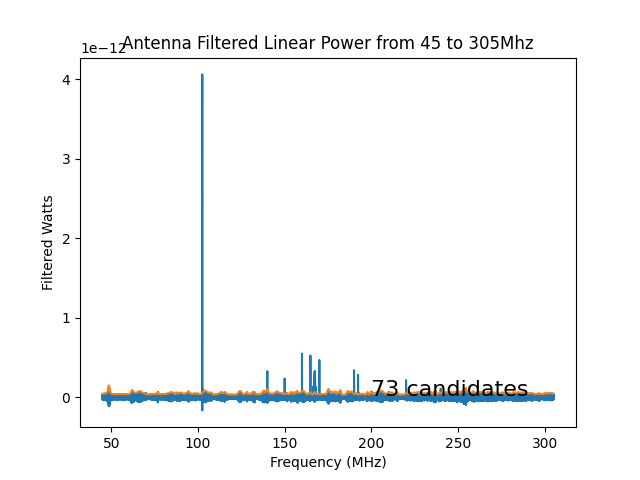

In [8]:
# back to no terminators insidie
#termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV'

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_termBothOutAndIn_allComputersOn_agilentOff_powerOff_extCableUnplugged_tapeOnSHV'

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)

W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart} to {pltFreqStop}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')

done mp
126 antenna candidates at 10 sigma


Text(0, 0.5, 'Filtered Watts')

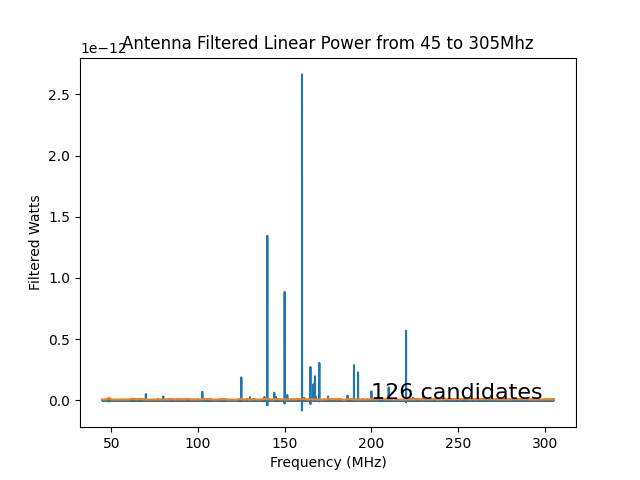

In [7]:

# back to no terminators insidie
#termBothOutAndIn_allComputersOn_powerOff_extCableUnplugged_tapeOnSHV'

path = '/drBigBoy/darkRadio/daqAnalysisAndExperiments/run1p3/rfInterferenceTesting/data_gitignore/W_dict_ultraParanoid_everythingoff_1MFFTs_3_26_23'

W_dict = np.load(path+'.npy', 
    allow_pickle=True
)
nSigma = 10
W_array = W_dict.item()['chBSpec_W']
filt_array = rollingMadLim(W_array, nSigma = nSigma)

filtAntSpec         = filt_array[1][1:]
antRollingMadLim    = filt_array[0][1:]


pltFreqStart = 45
pltFreqStop = 305
pltIdxStart = freq2Idx(pltFreqStart, freqs)
pltIdxStop = freq2Idx(pltFreqStop, freqs)

antCanList_idx = ((filtAntSpec > antRollingMadLim)) 
antCandidateTotal = (antCanList_idx[pltIdxStart:pltIdxStop].sum())
print(f"{antCandidateTotal} antenna candidates at {nSigma} sigma")

plt.close('all')

plt.figure()
plt.plot(freqs[pltIdxStart:pltIdxStop], filtAntSpec[pltIdxStart:pltIdxStop])
plt.plot(freqs[pltIdxStart:pltIdxStop],(antRollingMadLim)[pltIdxStart:pltIdxStop])
plt.text(200,.75e-14, f'{antCandidateTotal} candidates',size=16)
plt.title(f"Antenna Filtered Linear Power from {pltFreqStart} to {pltFreqStop}Mhz")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Filtered Watts')